(50000, 28, 28) (50000,)


<IPython.core.display.Javascript object>


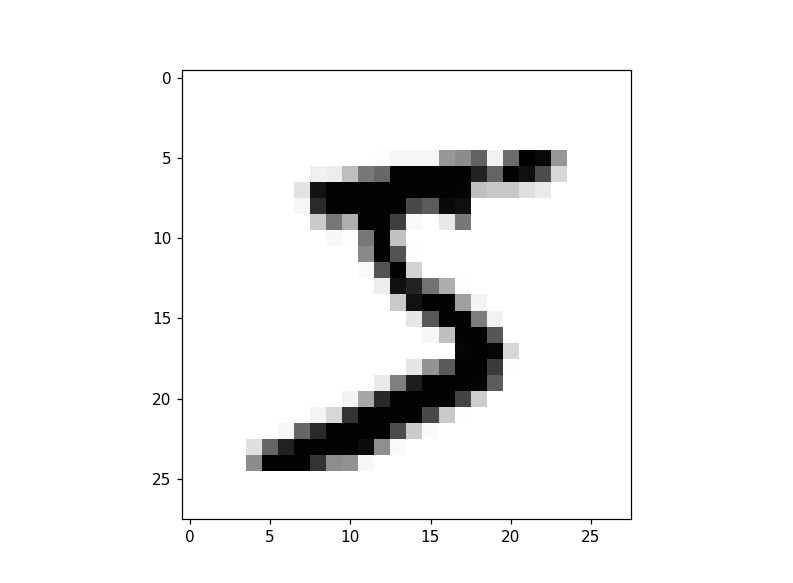

In [15]:
from preprocessed_mnist import load_dataset
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()



print(X_train.shape, y_train.shape)
import matplotlib.pyplot as plt
%matplotlib notebook
plt.imshow(X_train[0], cmap="Greys");

X_train = X_train.reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test  = X_test.reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [2]:

import os
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
import tensorflow as tf
s = tf.InteractiveSession()

In [3]:
devices = s.list_devices()
for d in devices:
  print(d.name)

/job:localhost/replica:0/task:0/device:CPU:0


In [4]:
IMAGESIZE = 28

#Placeholders for the input data
input_X = tf.placeholder('float32', [None,28*28])
input_y = tf.placeholder('float32', [None])
keep_prob = tf.placeholder(tf.float32)

# Define MLP

In [5]:
def input2logits(inputs):
    
    
    dense0=tf.layers.dense(
        inputs=input_X,
        units=150,
        activation=tf.nn.relu,
        use_bias=True,
    )
    dense0 = tf.nn.dropout(x=dense0,keep_prob=keep_prob)
    
    dense1=tf.layers.dense(
        inputs=dense0,
        units=100,
        activation=tf.nn.relu,
        use_bias=True,
    )
    dense1 = tf.nn.dropout(x=dense1,keep_prob=keep_prob)
    
    dense2=tf.layers.dense(
        inputs=dense1,
        units=60,
        activation=tf.nn.relu,
        use_bias=True,
    )
    dense2 = tf.nn.dropout(x=dense2,keep_prob=keep_prob)
    
    dense3=tf.layers.dense(
        inputs=dense2,
        units=40,
        activation=tf.nn.sigmoid,
        use_bias=True,
    )
    dense3 = tf.nn.dropout(x=dense3,keep_prob=keep_prob)
    
    dense4=tf.layers.dense(
        inputs=dense3,
        units=20,
        activation=tf.nn.sigmoid,
        use_bias=True,
    )
    logits = tf.layers.dense(inputs=dense4, units=10)
    
    return logits

In [6]:
logits = input2logits(input_X)

train_prediction = tf.nn.softmax(logits)

onehot_labels = tf.one_hot(indices=tf.cast(input_y, tf.int32), depth=10)

loss = tf.losses.softmax_cross_entropy(onehot_labels=onehot_labels, logits=logits)

# starter_learning_rate = 0.00056
# global_step = tf.Variable(0, trainable=False)
# learning_rate = tf.train.exponential_decay(starter_learning_rate, global_step, 100, 0.85, staircase=True)
# optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)

optimizer = tf.train.AdamOptimizer().minimize(loss)

In [7]:
def accuracy(predictions, labels):
    return (100.0 * np.sum(np.argmax(predictions, 1) == labels)
          / predictions.shape[0])

# Training with Stochastic Gradient Descent

In [9]:
l_train=[]; l_test=[]; a_train=[]; a_test=[]; epochs=[]


batch_size = 500
numsubiter = int(X_train.shape[0]/batch_size)
splitpoints = [(i+1)*batch_size for i in range(numsubiter-1)]

s.run(tf.global_variables_initializer())
for epoch in range(100):
    
    for X_train_sub, y_train_sub in zip(np.split(X_train, splitpoints),np.split(y_train, splitpoints)):
        s.run(optimizer, {input_X: X_train_sub,
                          input_y: y_train_sub,
                          keep_prob: 0.5})
    
    if epoch%10==0:
        loss_train = s.run(loss, {input_X: X_train, input_y: y_train, keep_prob: 1.0})
        loss_test  = s.run(loss, {input_X: X_test, input_y: y_test, keep_prob: 1.0})
        train_pred = s.run(train_prediction, {input_X: X_train, input_y: y_train, keep_prob: 1.0})
        test_pred = s.run(train_prediction, {input_X: X_test, input_y: y_test, keep_prob: 1.0})
        print("train loss at epoch %i: %.4f" % (epoch, loss_train))
        print("test  loss at epoch %i: %.4f" % (epoch, loss_test))
        print("  train accuracy:",accuracy(train_pred,y_train) )
        print("  test  accuracy:",accuracy(test_pred,y_test) )
        
        l_train.append(loss_train)
        l_test.append(loss_test)
        a_train.append(accuracy(train_pred,y_train))
        a_test.append(accuracy(test_pred,y_test))
        epochs.append(epoch)


train loss at epoch 0: 1.6993
test  loss at epoch 0: 1.6944
  train accuracy: 60.038
  test  accuracy: 60.71
train loss at epoch 10: 0.3192
test  loss at epoch 10: 0.3458
  train accuracy: 87.67
  test  accuracy: 87.01
train loss at epoch 20: 0.1903
test  loss at epoch 20: 0.2316
  train accuracy: 96.584
  test  accuracy: 95.67
train loss at epoch 30: 0.1172
test  loss at epoch 30: 0.1688
  train accuracy: 97.71
  test  accuracy: 96.79
train loss at epoch 40: 0.0918
test  loss at epoch 40: 0.1523
  train accuracy: 98.254
  test  accuracy: 97.14
train loss at epoch 50: 0.0803
test  loss at epoch 50: 0.1466
  train accuracy: 98.45
  test  accuracy: 97.22
train loss at epoch 60: 0.0678
test  loss at epoch 60: 0.1443
  train accuracy: 98.694
  test  accuracy: 97.25
train loss at epoch 70: 0.0585
test  loss at epoch 70: 0.1438
  train accuracy: 98.864
  test  accuracy: 97.29
train loss at epoch 80: 0.0556
test  loss at epoch 80: 0.1391
  train accuracy: 98.896
  test  accuracy: 97.34
train 

# Plot losses over epochs

<IPython.core.display.Javascript object>


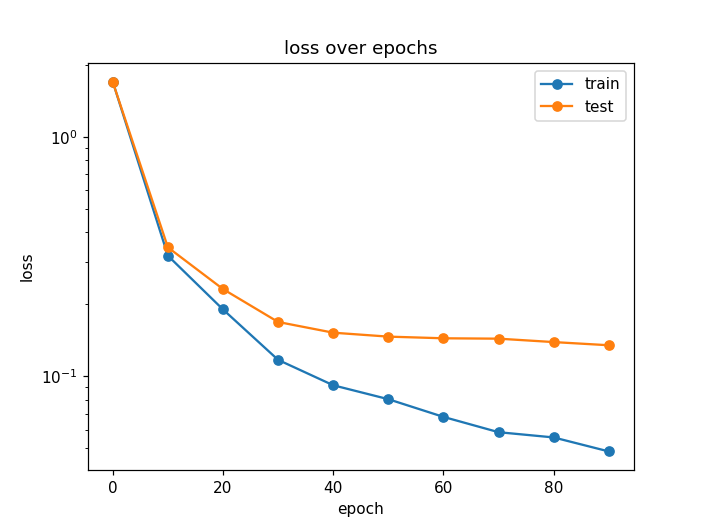

In [16]:
plt.figure()
plt.semilogy(epochs,l_train,'-o',label='train')
plt.semilogy(epochs,l_test,'-o',label='test')
plt.xlabel("epoch"); plt.ylabel("loss"); plt.title("loss over epochs")
plt.legend()

<IPython.core.display.Javascript object>


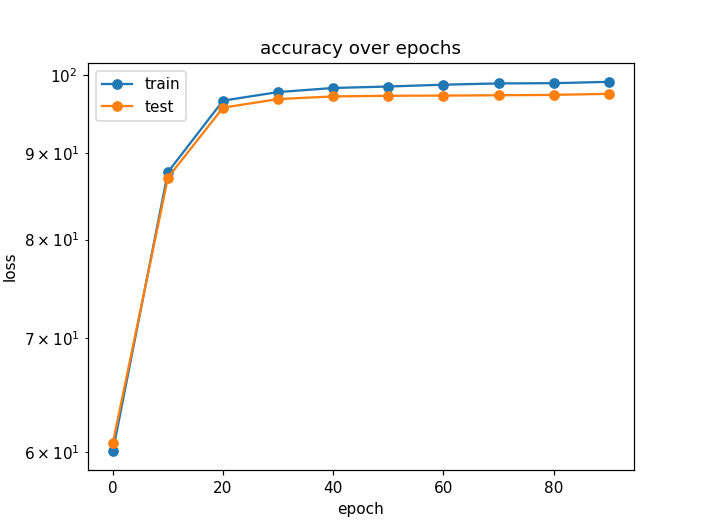

In [17]:
plt.figure()
plt.semilogy(epochs,a_train,'-o',label='train')
plt.semilogy(epochs,a_test,'-o',label='test')
plt.xlabel("epoch"); plt.ylabel("loss"); plt.title("accuracy over epochs")
plt.legend()